In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
# Global variables for plotting.
mpl.rcParams.update({'font.size': 18, 'figure.figsize': (12,12)})
pink_palette = ['#FC4993', '#70D6FF']

In [78]:
df=pd.read_csv("cc_info.csv")
df.dropna(how='any', inplace=True)
all_labels=df.columns[1:].values.tolist()
print('Dimension of the train dataset: {}'.format(np.shape(df)))

Dimension of the train dataset: (8636, 18)


In [79]:
df.sample(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3212  C13305  4432.514906           1.000000    1543.75           1543.75   
582   C10606  7088.358802           1.000000       0.00              0.00   
7361  C17561  1618.277656           1.000000    3031.28           1616.35   
841   C10872  3616.993845           0.888889       0.00              0.00   
5334  C15486  2056.866139           1.000000    3373.70           3373.70   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3212                    0.00   2188.478475             0.750000   
582                     0.00   3118.050456             0.000000   
7361                 1414.93      0.000000             0.909091   
841                     0.00   4947.781762             0.000000   
5334                    0.00      0.000000             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3212                    0.750000                          0.000000   
582                     0.000000                          0.000000   
7361                    0.909091                          0.636364   
841                     0.000000                          0.000000   
5334                    0.833333                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3212                0.500000                11             12        9000.0   
582                 0.083333                 2              0        7500.0   
7361                0.000000                 0             52        3200.0   
841                 0.555556                 7              0        5500.0   
5334                0.000000                 0             31        7000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3212  1042.515320       1307.289892               0.0      12  
582   4539.526102       2183.319473               0.0      12  
7361  2513.922495        371.025272               0.0      11  
841    529.726072       1294.501736               0.0       9  
5334  2647.183713        490.378067               0.0      12

In [4]:
missing_df = df.columns[df.isna().any()].tolist()
print('Columns with missing value in train data: ',missing_df)

Columns with missing value in train data:  []


In [5]:
df.nunique()

CUST_ID                             8636
BALANCE                             8631
BALANCE_FREQUENCY                     42
PURCHASES                           6015
ONEOFF_PURCHASES                    3922
INSTALLMENTS_PURCHASES              4341
CASH_ADVANCE                        4206
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         203
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [6]:
# Count how many entries are missing in each column
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [25]:
df.sample(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1584  C11637  2000.797758           1.000000    1037.50              0.00   
935   C10969   330.273411           1.000000      53.80             53.80   
2133  C12200   273.247883           1.000000      60.00             60.00   
3052  C13141    74.653975           0.818182     603.60            253.60   
6707  C16895  3895.677052           1.000000     144.77             79.99   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1584                 1037.50      0.000000             0.416667   
935                     0.00      0.000000             0.250000   
2133                    0.00      0.000000             0.083333   
3052                  350.00      0.000000             0.666667   
6707                   64.78   6492.291188             0.333333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1584                    0.000000                          0.416667   
935                     0.250000                          0.000000   
2133                    0.083333                          0.000000   
3052                    0.250000                          0.416667   
6707                    0.083333                          0.166667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1584                0.000000                 0              5        7500.0   
935                 0.000000                 0              6        2500.0   
2133                0.000000                 0              1        2300.0   
3052                0.000000                 0             11        2500.0   
6707                0.833333                27              4       10000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1584  1864.665644        450.605909          0.272727      12  
935    429.112894        171.649200          0.000000      12  
2133   111.559902        208.976648          0.000000      12  
3052   431.710102        134.295856          0.090909      12  
6707  5709.895929        886.322345          0.000000      12

In [7]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [69]:
(df.BALANCE < df.PURCHASES).sum()

3832

In [22]:
from sklearn import manifold, datasets
from sklearn.manifold import TSNE
X = df[all_labels].copy()
'''
Let t-SNE try to compress the 8 dimensional data into 2 dimensions while relatively preserving 
the notion of nearness (that is the euclidean distance between vectors)
'''
sample = 3000  # Only use the first 3000 data points.
X_embedded = TSNE(n_components=2, perplexity=5).fit_transform(X.sample(sample))

In [23]:
snex = [x[0] for x in X_embedded]
sney = [x[1] for x in X_embedded]

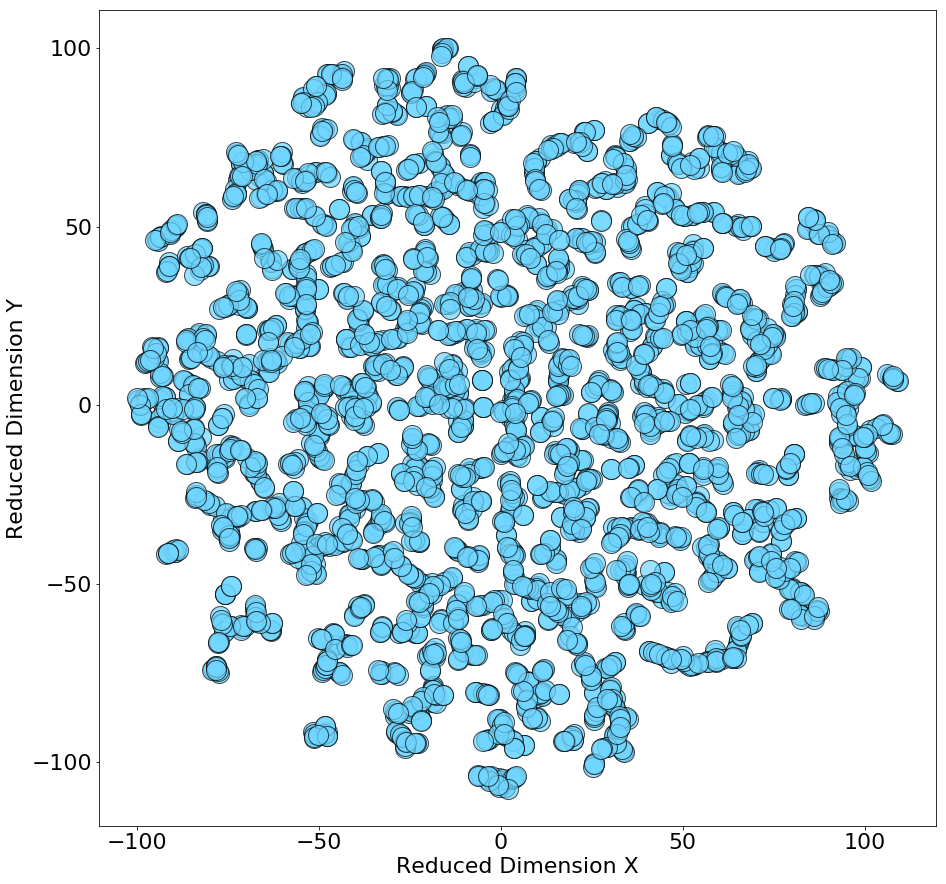

In [24]:
# Plot the result of t-SNE
fig, ax = plt.subplots()
ax.scatter(snex,sney, c='#70D6FF', edgecolors='black', s=400, alpha=0.7)
# ax.scatter(X_embedded[~mal_inds, 0], X_embedded[~mal_inds, 1], c='#FC4993', edgecolors='black', s=400, alpha=0.7)
ax.set_xlabel('Reduced Dimension X')
ax.set_ylabel('Reduced Dimension Y')
plt.savefig('tsne_plot_p5.png', dpi=200, bbox_inches='tight')

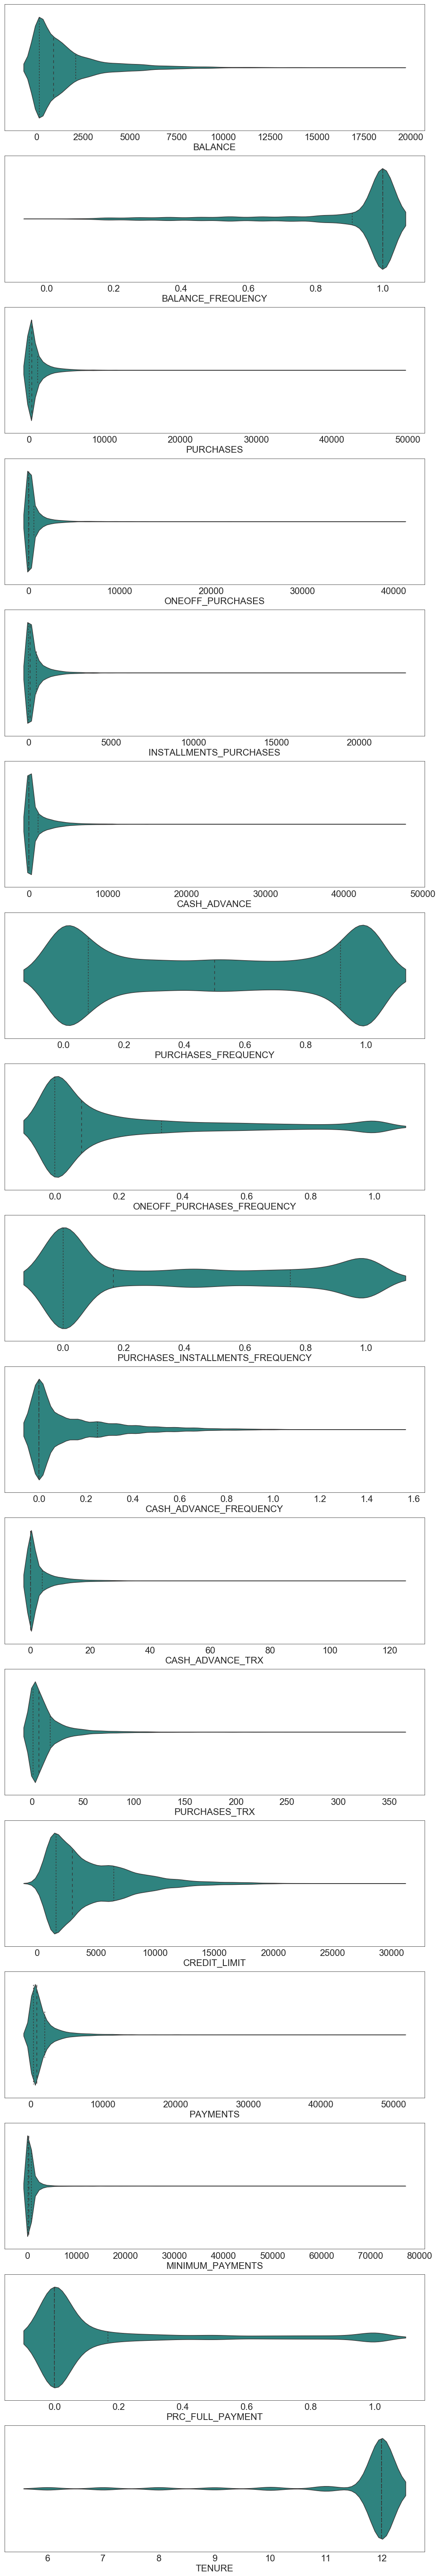

In [59]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,112))
N = len(df.columns)-1
for i,col in zip(range(N),df.columns[1:]):
    plt.subplot(N,1,i+1)
    sns.violinplot(x=df[col],split=True, inner="quart", orient='h', palette='viridis')
    ax.legend(col)

In [120]:
purchase_freq_mean = np.mean(df['PURCHASES_FREQUENCY'])
df['PURCHASES_FREQUENCY_CAT'] = df['PURCHASES_FREQUENCY'].apply(lambda x: 
                                                                   'High' if x >= purchase_freq_mean else 'Low')

df['ONEOFF_PURCHASES_FREQUENCY_CAT'] = df['ONEOFF_PURCHASES_FREQUENCY'].apply(lambda x:
                                                                                 'High' if x >= 0.8 else 'Low')
install_freq_median = np.median(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
df['PURCHASES_INSTALLMENTS_FREQUENCY_CAT'] = df['PURCHASES_INSTALLMENTS_FREQUENCY'].apply(lambda x:'High' if x >= install_freq_median else 'Low')

df['PRC_FULL_PAYMENT_CAT'] = df['PRC_FULL_PAYMENT'].apply(lambda x:'High' if x >= 0.2 else 'Low')

In [121]:
df.sample(3)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5224  C15371    50.366106           0.363636     507.57            507.57   
8369  C18592    23.167831           1.000000     375.00              0.00   
3199  C13292  1461.259621           1.000000     178.67              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5224                    0.00           0.0             0.083333   
8369                  375.00           0.0             1.000000   
3199                  178.67           0.0             0.500000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5224                    0.083333                               0.0   
8369                    0.000000                               1.0   
3199                    0.000000                               0.5   

             ...           PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  \
5224         ...                       2        6000.0  503.254349   
8369         ...                      12        2500.0  389.716275   
3199         ...                       6        6500.0  666.357134   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  PURCHASES_FREQUENCY_CAT  \
5224         34.488495          0.000000      12                      Low   
8369        178.840940          0.916667      12                     High   
3199        491.582146          0.000000      12                     High   

      ONEOFF_PURCHASES_FREQUENCY_CAT PURCHASES_INSTALLMENTS_FREQUENCY_CAT  \
5224                             Low                                  Low   
8369                             Low                                 High   
3199                             Low                                 High   

     PRC_FULL_PAYMENT_CAT  
5224                  Low  
8369                 High  
3199                  Low  

[3 rows x 22 columns]

In [105]:
# (df.PURCHASES - df.PAYMENTS)

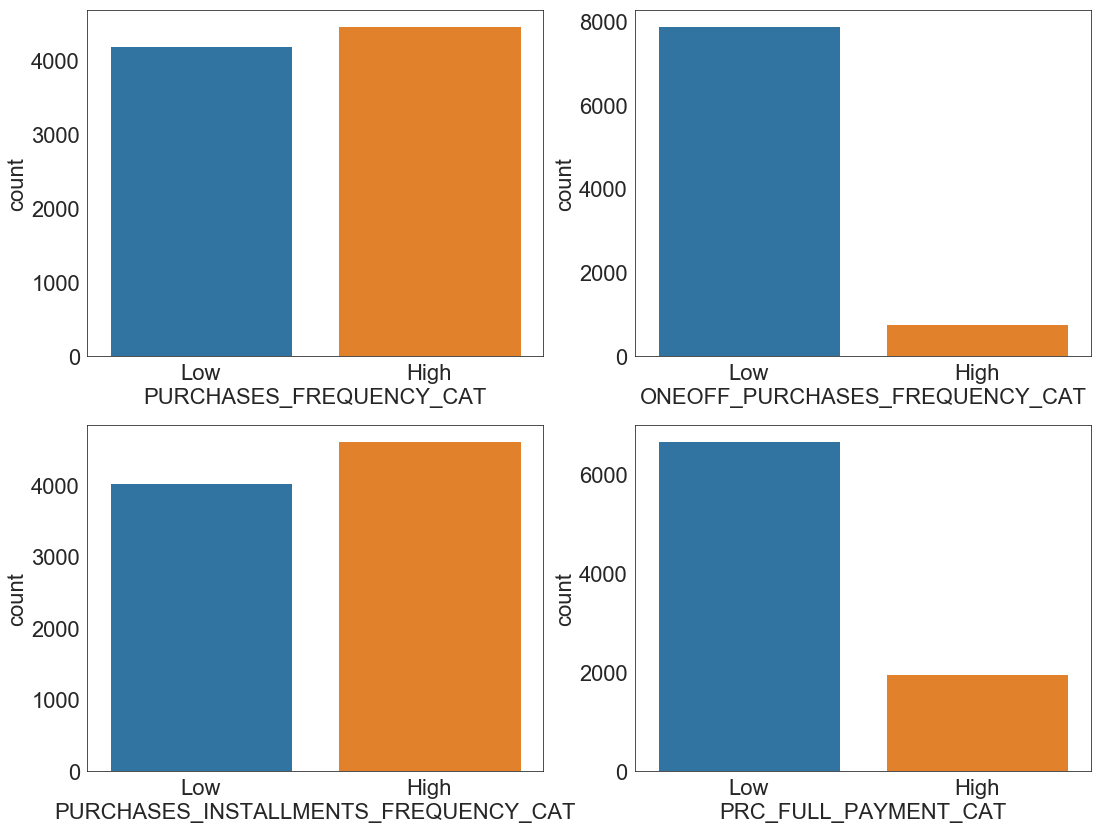

In [96]:
plt.figure(figsize=(18,14))
plt.subplot(2,2,1)
_ = sns.countplot(df['PURCHASES_FREQUENCY_CAT']);
plt.subplot(2,2,2)
_ = sns.countplot(df['ONEOFF_PURCHASES_FREQUENCY_CAT']);
plt.subplot(2,2,3)
_ = sns.countplot(df['PURCHASES_INSTALLMENTS_FREQUENCY_CAT']);
plt.subplot(2,2,4)
_ = sns.countplot(df['PRC_FULL_PAYMENT_CAT']);

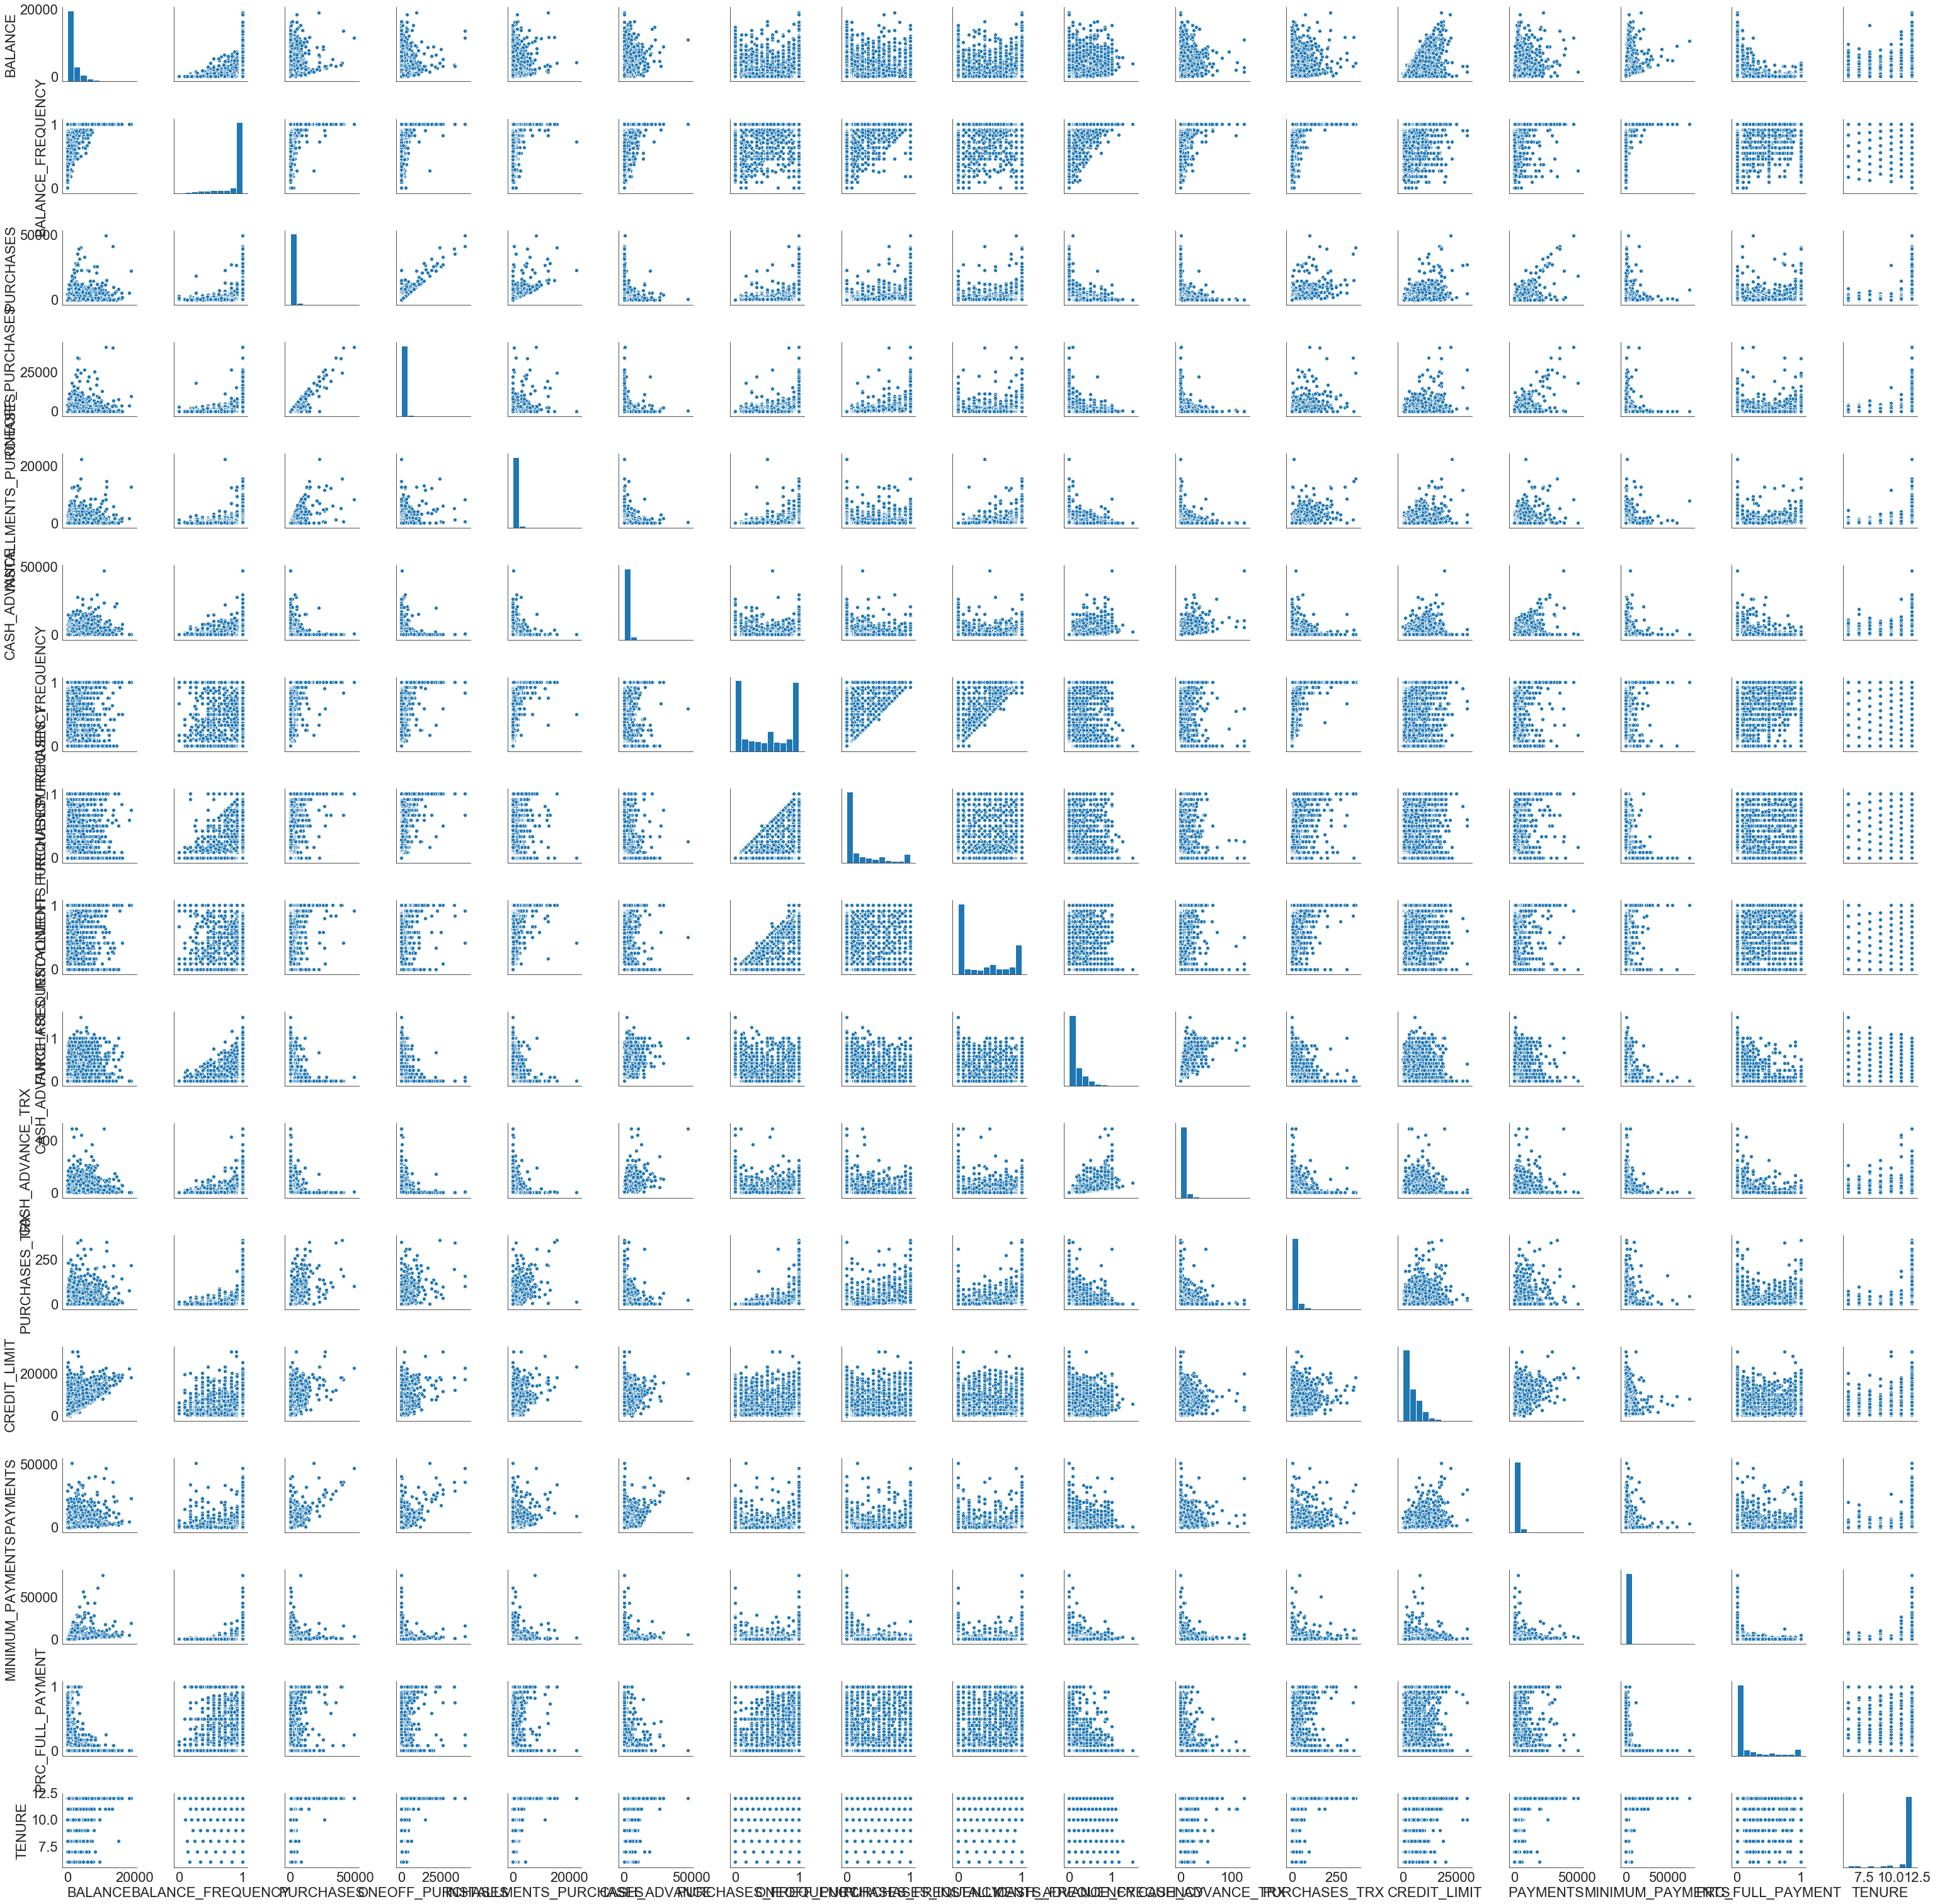

In [70]:
sns.pairplot(df)

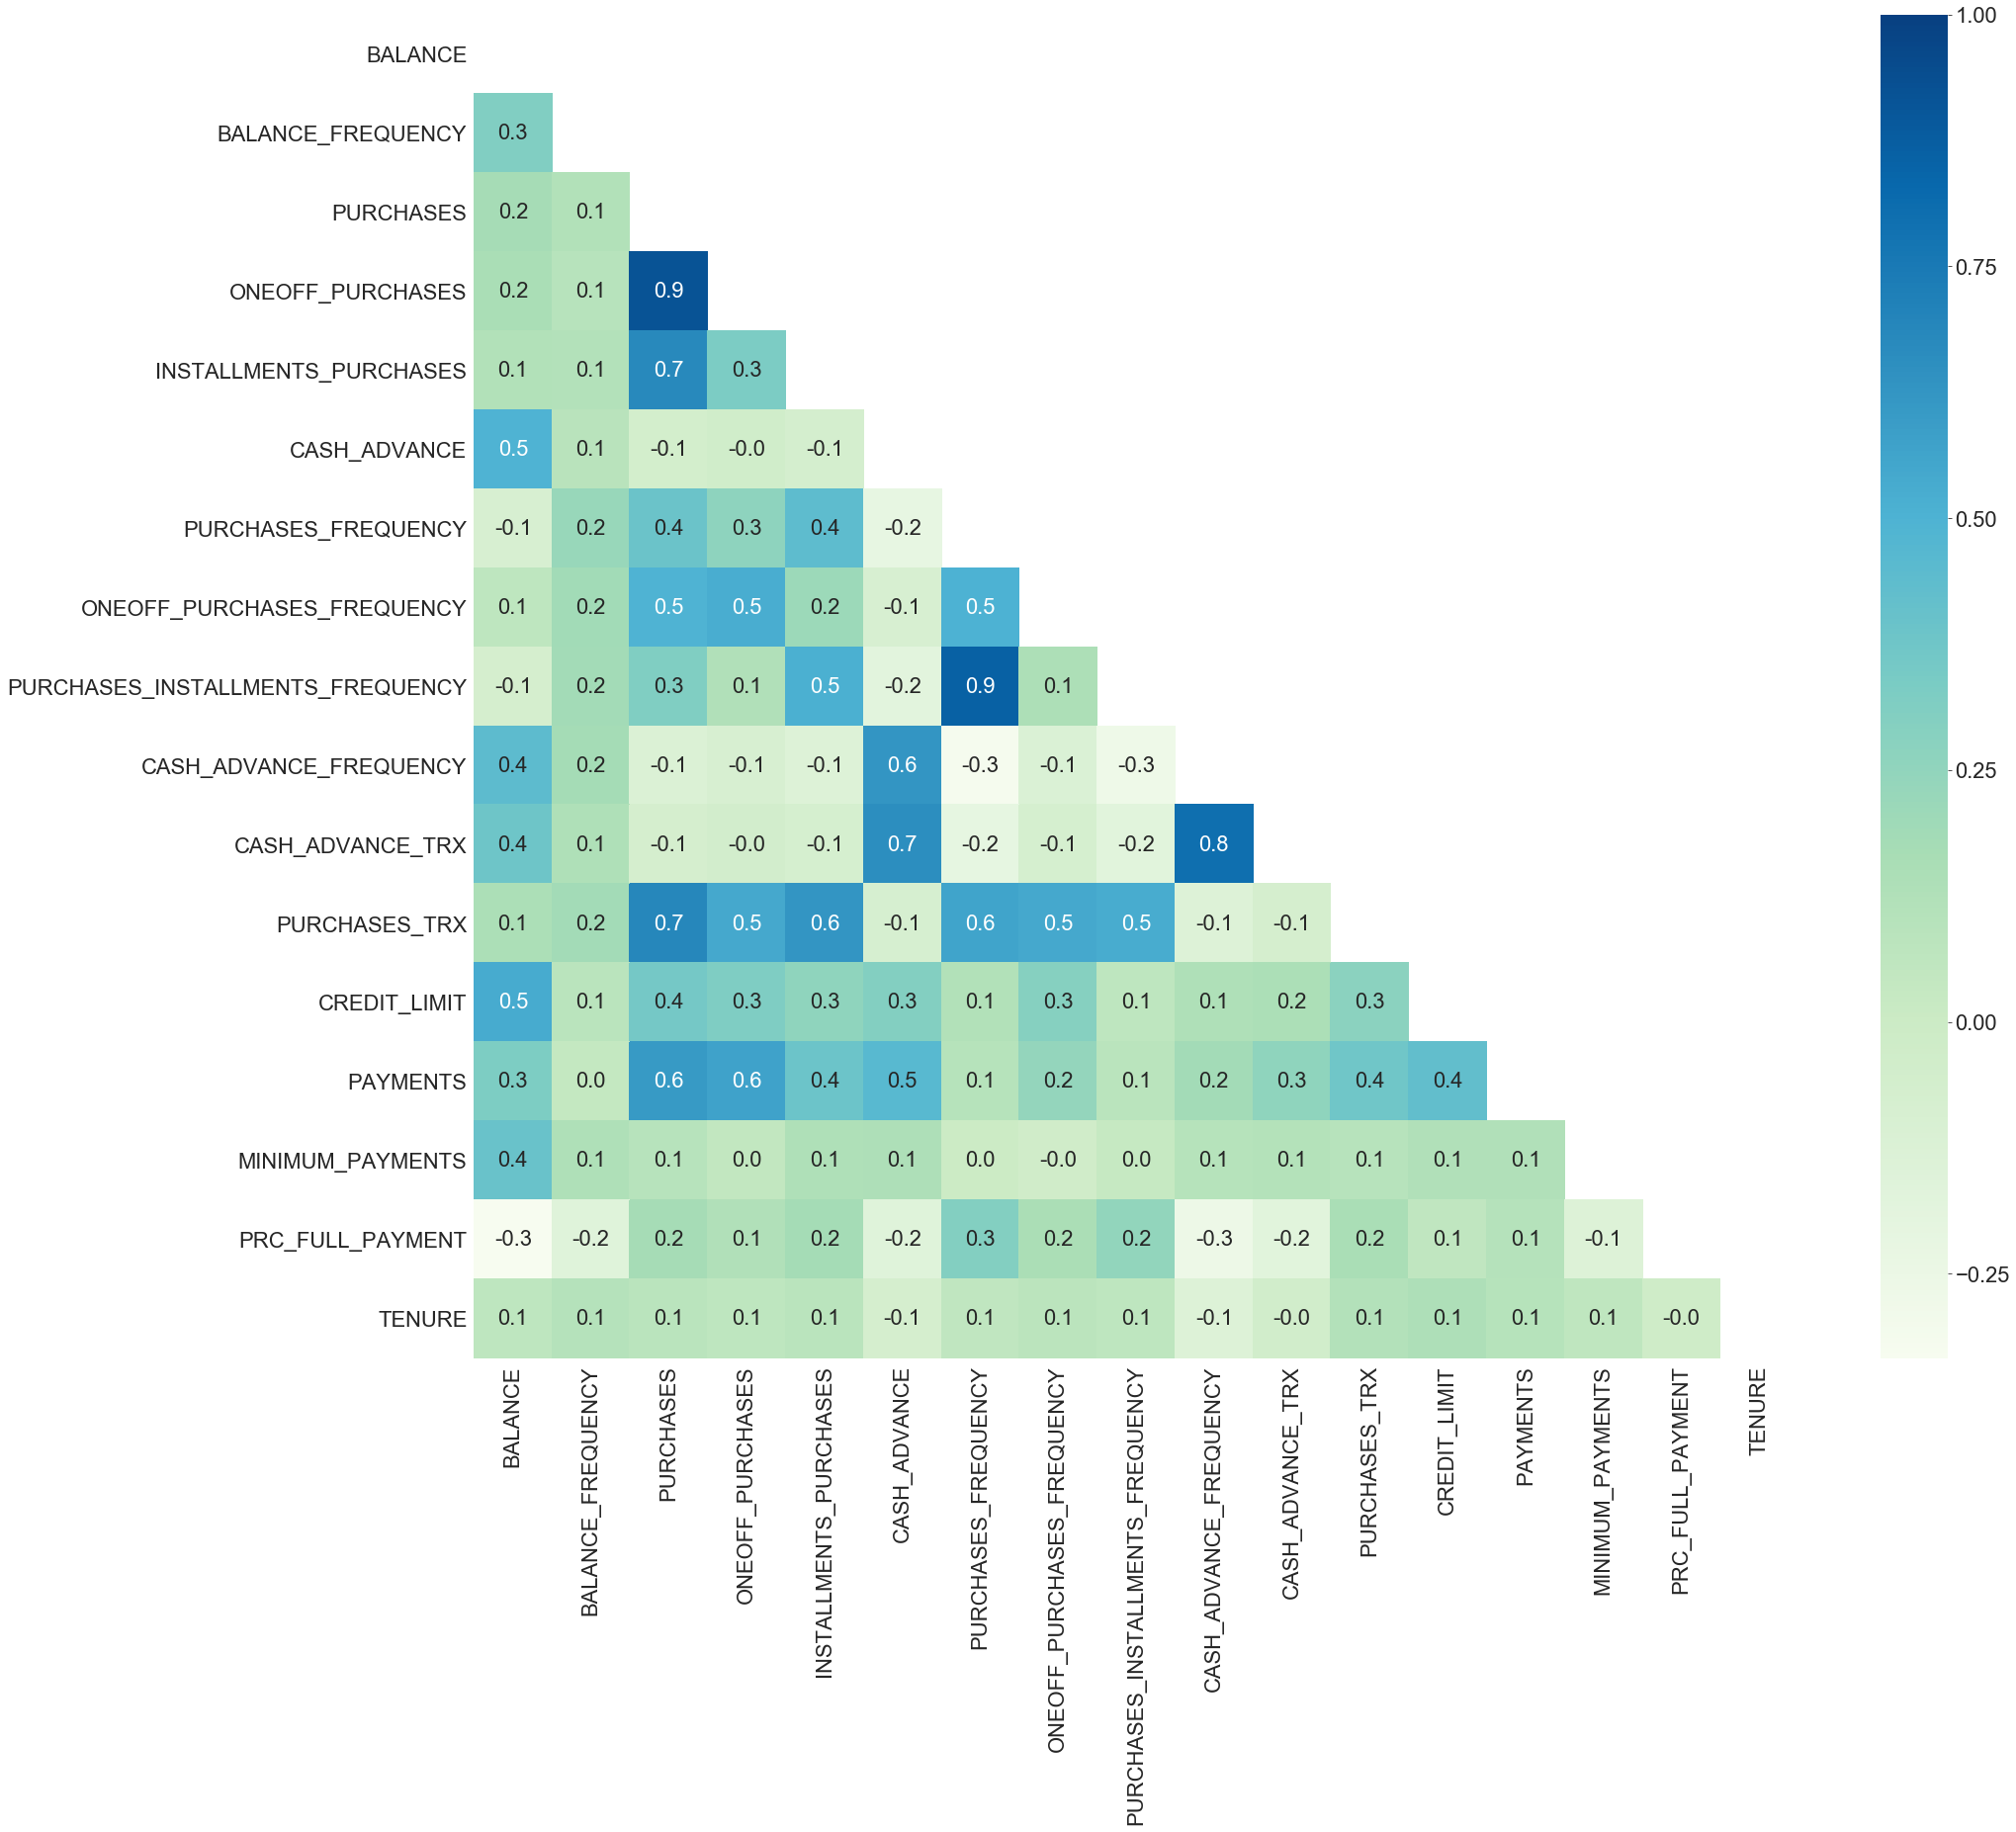

In [66]:
# fig, ax = plt.subplots()
plt.figure(figsize=(30,25))
# fig.set_size_inches(8, 6)
corr = df[all_labels].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask, annot=True, fmt= '.1f', cmap="GnBu");

## How does credit card companies make money?
when the payment is made via card, bank generally have a tie up with the merchants regarding these. So probably it would be safe to assume that out of this $5, $0.5 will be shared between both the banks in the chain.

This is what is the primary revenue for all the banks which issue the cards.

Above this also they have many revenues which are more or less opportunity cost provided by the customers as below:

a) ATM Withdrawal Charges.

b) Late payment fees.

c) Cash On Call.

d) EMI on Cash On Call.

e) Convert to EMIs

f) Transaction costs of any of the above charges.

g) Annual payment charges.

Text(0, 0.5, 'ONEOFF_PURCHASES')

<Figure size 720x720 with 0 Axes>

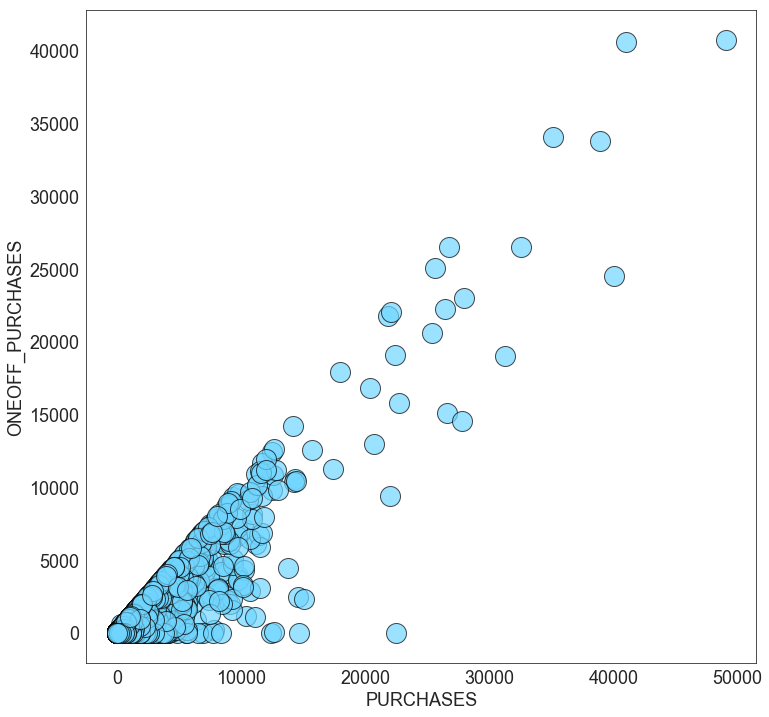

In [131]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.scatter(df.PURCHASES,df.ONEOFF_PURCHASES, c='#70D6FF', edgecolors='black', s=400, alpha=0.7)
# ax.scatter(X_embedded[~mal_inds, 0], X_embedded[~mal_inds, 1], c='#FC4993', edgecolors='black', s=400, alpha=0.7)
ax.set_xlabel('PURCHASES')
ax.set_ylabel('ONEOFF_PURCHASES')

Text(0, 0.5, 'INSTALLMENTS_PURCHASES')

<Figure size 720x720 with 0 Axes>

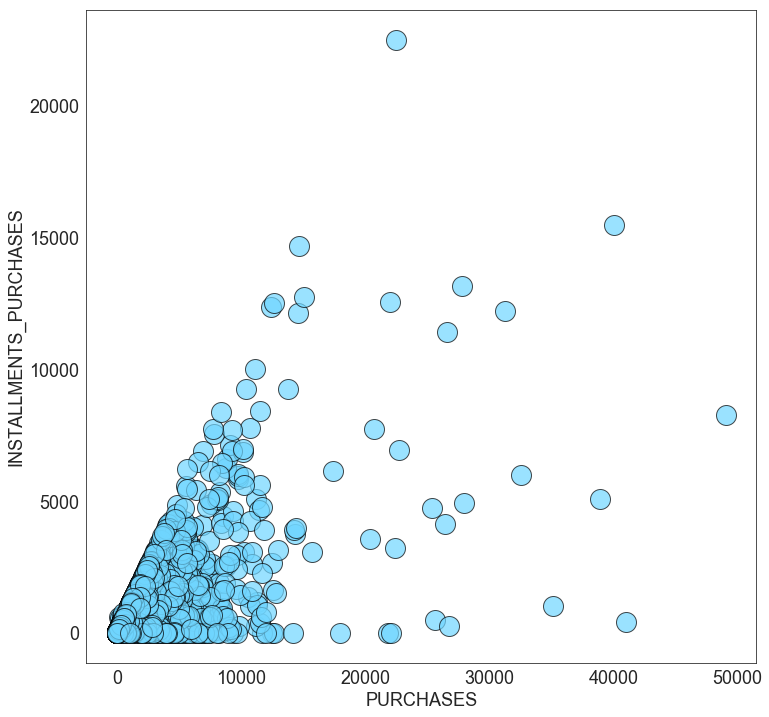

In [132]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.scatter(df.PURCHASES,df.INSTALLMENTS_PURCHASES, c='#70D6FF', edgecolors='black', s=400, alpha=0.7)
# ax.scatter(X_embedded[~mal_inds, 0], X_embedded[~mal_inds, 1], c='#FC4993', edgecolors='black', s=400, alpha=0.7)
ax.set_xlabel('PURCHASES')
ax.set_ylabel('INSTALLMENTS_PURCHASES')

In [125]:
X = df.drop(columns=['CUST_ID','PURCHASES'])
y = df['PURCHASES']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.reset_index(inplace = True, drop = True);
X_test.reset_index(inplace = True, drop = True);
y_train.reset_index(inplace = True, drop = True);
y_test.reset_index(inplace = True, drop = True);
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 6908 samples.
Testing set has 1728 samples.


In [128]:
from catboost import CatBoostRegressor
categorical = np.where(X_train.dtypes != np.float)[0]
model=CatBoostRegressor(iterations=1000, depth=7, learning_rate=0.02, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical,eval_set=(X_test, y_test),plot=True)

0:	learn: 2294.3088325	test: 2616.7221015	best: 2616.7221015 (0)	total: 48.9ms	remaining: 48.9s
1:	learn: 2259.8114881	test: 2578.9934974	best: 2578.9934974 (1)	total: 84.5ms	remaining: 42.2s
2:	learn: 2226.3224365	test: 2543.3467891	best: 2543.3467891 (2)	total: 120ms	remaining: 40s
3:	learn: 2192.5114635	test: 2506.4106455	best: 2506.4106455 (3)	total: 157ms	remaining: 39.1s
4:	learn: 2160.2856663	test: 2472.6053144	best: 2472.6053144 (4)	total: 196ms	remaining: 39s
5:	learn: 2127.0924948	test: 2437.6801517	best: 2437.6801517 (5)	total: 235ms	remaining: 38.9s
6:	learn: 2096.4235473	test: 2407.0131008	best: 2407.0131008 (6)	total: 269ms	remaining: 38.1s
7:	learn: 2065.1883538	test: 2373.3230306	best: 2373.3230306 (7)	total: 292ms	remaining: 36.2s
8:	learn: 2036.3214810	test: 2344.3072385	best: 2344.3072385 (8)	total: 313ms	remaining: 34.5s
9:	learn: 2006.2713321	test: 2312.7160745	best: 2312.7160745 (9)	total: 336ms	remaining: 33.2s
10:	learn: 1977.9532440	test: 2284.2753616	best: 228

MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed…

40:	learn: 1310.7871882	test: 1586.4362436	best: 1586.4362436 (40)	total: 935ms	remaining: 21.9s
41:	learn: 1293.8248157	test: 1568.5656848	best: 1568.5656848 (41)	total: 977ms	remaining: 22.3s
42:	learn: 1278.2167334	test: 1552.3512849	best: 1552.3512849 (42)	total: 1.04s	remaining: 23.3s
43:	learn: 1260.9896905	test: 1534.5621188	best: 1534.5621188 (43)	total: 1.07s	remaining: 23.3s
44:	learn: 1245.1412030	test: 1518.3237411	best: 1518.3237411 (44)	total: 1.1s	remaining: 23.3s
45:	learn: 1229.6630457	test: 1502.1931301	best: 1502.1931301 (45)	total: 1.12s	remaining: 23.3s
46:	learn: 1214.6997723	test: 1486.0214312	best: 1486.0214312 (46)	total: 1.15s	remaining: 23.2s
47:	learn: 1199.0237274	test: 1469.6588190	best: 1469.6588190 (47)	total: 1.23s	remaining: 24.3s
48:	learn: 1184.2777200	test: 1454.2645302	best: 1454.2645302 (48)	total: 1.26s	remaining: 24.5s
49:	learn: 1170.4391953	test: 1440.1250201	best: 1440.1250201 (49)	total: 1.29s	remaining: 24.6s
50:	learn: 1157.0931608	test: 1

128:	learn: 576.9417362	test: 821.0302349	best: 821.0302349 (128)	total: 3.21s	remaining: 21.7s
129:	learn: 573.5280578	test: 819.3996223	best: 819.3996223 (129)	total: 3.24s	remaining: 21.7s
130:	learn: 571.0843042	test: 816.3425431	best: 816.3425431 (130)	total: 3.26s	remaining: 21.6s
131:	learn: 567.9375527	test: 812.3520895	best: 812.3520895 (131)	total: 3.3s	remaining: 21.7s
132:	learn: 563.7451191	test: 807.2774737	best: 807.2774737 (132)	total: 3.33s	remaining: 21.7s
133:	learn: 560.0993717	test: 802.4849615	best: 802.4849615 (133)	total: 3.38s	remaining: 21.8s
134:	learn: 557.7205138	test: 799.4132231	best: 799.4132231 (134)	total: 3.41s	remaining: 21.9s
135:	learn: 553.6691671	test: 794.9395988	best: 794.9395988 (135)	total: 3.46s	remaining: 22s
136:	learn: 549.6125900	test: 790.1309266	best: 790.1309266 (136)	total: 3.5s	remaining: 22.1s
137:	learn: 546.3476738	test: 787.1553340	best: 787.1553340 (137)	total: 3.54s	remaining: 22.1s
138:	learn: 543.4899467	test: 784.0947792	be

215:	learn: 388.9176253	test: 652.3886459	best: 652.3886459 (215)	total: 5.97s	remaining: 21.7s
216:	learn: 387.5873401	test: 652.4407369	best: 652.3886459 (215)	total: 5.98s	remaining: 21.6s
217:	learn: 386.1160015	test: 651.1204593	best: 651.1204593 (217)	total: 6s	remaining: 21.5s
218:	learn: 385.3678614	test: 649.6577204	best: 649.6577204 (218)	total: 6.01s	remaining: 21.4s
219:	learn: 384.6721759	test: 648.6427582	best: 648.6427582 (219)	total: 6.03s	remaining: 21.4s
220:	learn: 383.3994345	test: 648.5013195	best: 648.5013195 (220)	total: 6.04s	remaining: 21.3s
221:	learn: 381.9413907	test: 647.1902197	best: 647.1902197 (221)	total: 6.06s	remaining: 21.2s
222:	learn: 381.1039342	test: 646.3280804	best: 646.3280804 (222)	total: 6.08s	remaining: 21.2s
223:	learn: 380.2719353	test: 645.4655429	best: 645.4655429 (223)	total: 6.09s	remaining: 21.1s
224:	learn: 379.1548426	test: 643.8787898	best: 643.8787898 (224)	total: 6.11s	remaining: 21s
225:	learn: 377.5696817	test: 643.5309259	bes

301:	learn: 312.2081864	test: 613.5443389	best: 613.5443389 (301)	total: 7.41s	remaining: 17.1s
302:	learn: 311.4383757	test: 613.3364576	best: 613.3364576 (302)	total: 7.43s	remaining: 17.1s
303:	learn: 311.0664877	test: 612.6397909	best: 612.6397909 (303)	total: 7.45s	remaining: 17.1s
304:	learn: 310.5695254	test: 611.8557092	best: 611.8557092 (304)	total: 7.46s	remaining: 17s
305:	learn: 309.3968155	test: 611.9905937	best: 611.8557092 (304)	total: 7.48s	remaining: 17s
306:	learn: 308.7522605	test: 612.0411045	best: 611.8557092 (304)	total: 7.5s	remaining: 16.9s
307:	learn: 308.7353238	test: 612.0180895	best: 611.8557092 (304)	total: 7.5s	remaining: 16.9s
308:	learn: 307.6594497	test: 611.4921708	best: 611.4921708 (308)	total: 7.52s	remaining: 16.8s
309:	learn: 307.0536387	test: 611.1309590	best: 611.1309590 (309)	total: 7.53s	remaining: 16.8s
310:	learn: 306.3482256	test: 610.8559157	best: 610.8559157 (310)	total: 7.55s	remaining: 16.7s
311:	learn: 305.6307757	test: 611.1014152	best

398:	learn: 265.9190101	test: 594.7505278	best: 594.4709463 (395)	total: 8.91s	remaining: 13.4s
399:	learn: 265.7443988	test: 594.6343772	best: 594.4709463 (395)	total: 8.94s	remaining: 13.4s
400:	learn: 265.7416852	test: 594.6205091	best: 594.4709463 (395)	total: 8.95s	remaining: 13.4s
401:	learn: 265.2379539	test: 594.7178944	best: 594.4709463 (395)	total: 8.96s	remaining: 13.3s
402:	learn: 264.8061416	test: 595.1331488	best: 594.4709463 (395)	total: 8.98s	remaining: 13.3s
403:	learn: 264.4054162	test: 595.1493967	best: 594.4709463 (395)	total: 9s	remaining: 13.3s
404:	learn: 263.7393512	test: 595.1629966	best: 594.4709463 (395)	total: 9.01s	remaining: 13.2s
405:	learn: 262.9299566	test: 595.1770890	best: 594.4709463 (395)	total: 9.02s	remaining: 13.2s
406:	learn: 262.1364982	test: 595.7839471	best: 594.4709463 (395)	total: 9.04s	remaining: 13.2s
407:	learn: 261.3470202	test: 595.9194368	best: 594.4709463 (395)	total: 9.05s	remaining: 13.1s
408:	learn: 261.0188386	test: 595.5171371	b

490:	learn: 232.1704703	test: 590.0479292	best: 589.9419070 (489)	total: 10.4s	remaining: 10.7s
491:	learn: 232.0751926	test: 590.0449417	best: 589.9419070 (489)	total: 10.4s	remaining: 10.7s
492:	learn: 231.8792221	test: 590.0618465	best: 589.9419070 (489)	total: 10.4s	remaining: 10.7s
493:	learn: 231.6132978	test: 589.9363084	best: 589.9363084 (493)	total: 10.4s	remaining: 10.7s
494:	learn: 231.0483772	test: 589.8564110	best: 589.8564110 (494)	total: 10.4s	remaining: 10.6s
495:	learn: 230.8719155	test: 589.6074075	best: 589.6074075 (495)	total: 10.4s	remaining: 10.6s
496:	learn: 230.8165947	test: 589.5314823	best: 589.5314823 (496)	total: 10.5s	remaining: 10.6s
497:	learn: 230.7377130	test: 589.5415038	best: 589.5314823 (496)	total: 10.5s	remaining: 10.5s
498:	learn: 230.5122153	test: 588.6174247	best: 588.6174247 (498)	total: 10.5s	remaining: 10.5s
499:	learn: 230.1703319	test: 588.6997736	best: 588.6174247 (498)	total: 10.5s	remaining: 10.5s
500:	learn: 229.9818277	test: 588.723418

580:	learn: 211.4393157	test: 586.0403242	best: 585.8081702 (578)	total: 11.8s	remaining: 8.53s
581:	learn: 211.0495427	test: 586.1160644	best: 585.8081702 (578)	total: 11.9s	remaining: 8.52s
582:	learn: 210.6651475	test: 586.1378012	best: 585.8081702 (578)	total: 11.9s	remaining: 8.49s
583:	learn: 210.5824872	test: 586.0705327	best: 585.8081702 (578)	total: 11.9s	remaining: 8.47s
584:	learn: 210.0809035	test: 586.0022048	best: 585.8081702 (578)	total: 11.9s	remaining: 8.45s
585:	learn: 209.8255863	test: 586.3198274	best: 585.8081702 (578)	total: 11.9s	remaining: 8.42s
586:	learn: 209.7669229	test: 586.3264734	best: 585.8081702 (578)	total: 11.9s	remaining: 8.4s
587:	learn: 209.6757447	test: 586.2179870	best: 585.8081702 (578)	total: 12s	remaining: 8.37s
588:	learn: 209.5927207	test: 586.2268000	best: 585.8081702 (578)	total: 12s	remaining: 8.35s
589:	learn: 209.3460374	test: 586.1703685	best: 585.8081702 (578)	total: 12s	remaining: 8.32s
590:	learn: 209.2523014	test: 586.1450064	best:

666:	learn: 197.3662318	test: 585.3335146	best: 585.0284562 (657)	total: 13.3s	remaining: 6.64s
667:	learn: 197.3509026	test: 585.3252272	best: 585.0284562 (657)	total: 13.3s	remaining: 6.62s
668:	learn: 197.2816580	test: 585.2632356	best: 585.0284562 (657)	total: 13.3s	remaining: 6.6s
669:	learn: 197.1843609	test: 585.0368907	best: 585.0284562 (657)	total: 13.4s	remaining: 6.58s
670:	learn: 197.1178190	test: 584.7762900	best: 584.7762900 (670)	total: 13.4s	remaining: 6.56s
671:	learn: 196.9258185	test: 584.7500107	best: 584.7500107 (671)	total: 13.4s	remaining: 6.54s
672:	learn: 196.9041320	test: 584.7112563	best: 584.7112563 (672)	total: 13.4s	remaining: 6.51s
673:	learn: 196.8503783	test: 584.7548210	best: 584.7112563 (672)	total: 13.4s	remaining: 6.49s
674:	learn: 196.7138149	test: 584.6597327	best: 584.6597327 (674)	total: 13.4s	remaining: 6.47s
675:	learn: 196.4472698	test: 584.7382818	best: 584.6597327 (674)	total: 13.4s	remaining: 6.45s
676:	learn: 195.8612444	test: 584.6007586

754:	learn: 187.2518307	test: 583.6705451	best: 583.6705451 (754)	total: 14.8s	remaining: 4.8s
755:	learn: 187.2030866	test: 583.6294779	best: 583.6294779 (755)	total: 14.8s	remaining: 4.78s
756:	learn: 187.0163006	test: 583.6049051	best: 583.6049051 (756)	total: 14.8s	remaining: 4.76s
757:	learn: 186.9902187	test: 583.5025100	best: 583.5025100 (757)	total: 14.9s	remaining: 4.74s
758:	learn: 186.8230227	test: 583.5860650	best: 583.5025100 (757)	total: 14.9s	remaining: 4.72s
759:	learn: 186.7049337	test: 583.6885709	best: 583.5025100 (757)	total: 14.9s	remaining: 4.7s
760:	learn: 186.5519431	test: 583.6622866	best: 583.5025100 (757)	total: 14.9s	remaining: 4.68s
761:	learn: 186.3429191	test: 583.9555664	best: 583.5025100 (757)	total: 14.9s	remaining: 4.66s
762:	learn: 186.1093928	test: 583.9084592	best: 583.5025100 (757)	total: 14.9s	remaining: 4.64s
763:	learn: 185.8861485	test: 583.9181294	best: 583.5025100 (757)	total: 14.9s	remaining: 4.62s
764:	learn: 185.6064678	test: 583.5858451	

851:	learn: 177.3905902	test: 583.2603112	best: 582.8924581 (831)	total: 16.5s	remaining: 2.86s
852:	learn: 177.1584989	test: 583.2903837	best: 582.8924581 (831)	total: 16.5s	remaining: 2.84s
853:	learn: 176.9891907	test: 583.1604967	best: 582.8924581 (831)	total: 16.5s	remaining: 2.82s
854:	learn: 176.9737280	test: 583.1545917	best: 582.8924581 (831)	total: 16.5s	remaining: 2.8s
855:	learn: 176.9652035	test: 583.1700650	best: 582.8924581 (831)	total: 16.5s	remaining: 2.78s
856:	learn: 176.5294913	test: 583.0057634	best: 582.8924581 (831)	total: 16.6s	remaining: 2.76s
857:	learn: 176.3676098	test: 583.1352608	best: 582.8924581 (831)	total: 16.6s	remaining: 2.74s
858:	learn: 176.3415066	test: 583.1306245	best: 582.8924581 (831)	total: 16.6s	remaining: 2.72s
859:	learn: 176.1688683	test: 583.0961805	best: 582.8924581 (831)	total: 16.6s	remaining: 2.7s
860:	learn: 176.0905422	test: 583.1586366	best: 582.8924581 (831)	total: 16.6s	remaining: 2.68s
861:	learn: 176.0705426	test: 583.0584898	

945:	learn: 169.9702561	test: 580.7652930	best: 580.7595589 (944)	total: 18.1s	remaining: 1.03s
946:	learn: 169.9587826	test: 580.6722178	best: 580.6722178 (946)	total: 18.1s	remaining: 1.01s
947:	learn: 169.9522626	test: 580.6084373	best: 580.6084373 (947)	total: 18.1s	remaining: 995ms
948:	learn: 169.9371103	test: 580.5754237	best: 580.5754237 (948)	total: 18.2s	remaining: 976ms
949:	learn: 169.9308149	test: 580.5126593	best: 580.5126593 (949)	total: 18.2s	remaining: 956ms
950:	learn: 169.9200130	test: 580.4731425	best: 580.4731425 (950)	total: 18.2s	remaining: 937ms
951:	learn: 169.9131076	test: 580.4137361	best: 580.4137361 (951)	total: 18.2s	remaining: 917ms
952:	learn: 169.9072038	test: 580.3897227	best: 580.3897227 (952)	total: 18.2s	remaining: 898ms
953:	learn: 169.8766017	test: 580.3602382	best: 580.3602382 (953)	total: 18.2s	remaining: 879ms
954:	learn: 169.8598858	test: 580.3549048	best: 580.3549048 (954)	total: 18.2s	remaining: 860ms
955:	learn: 169.7282137	test: 580.288824

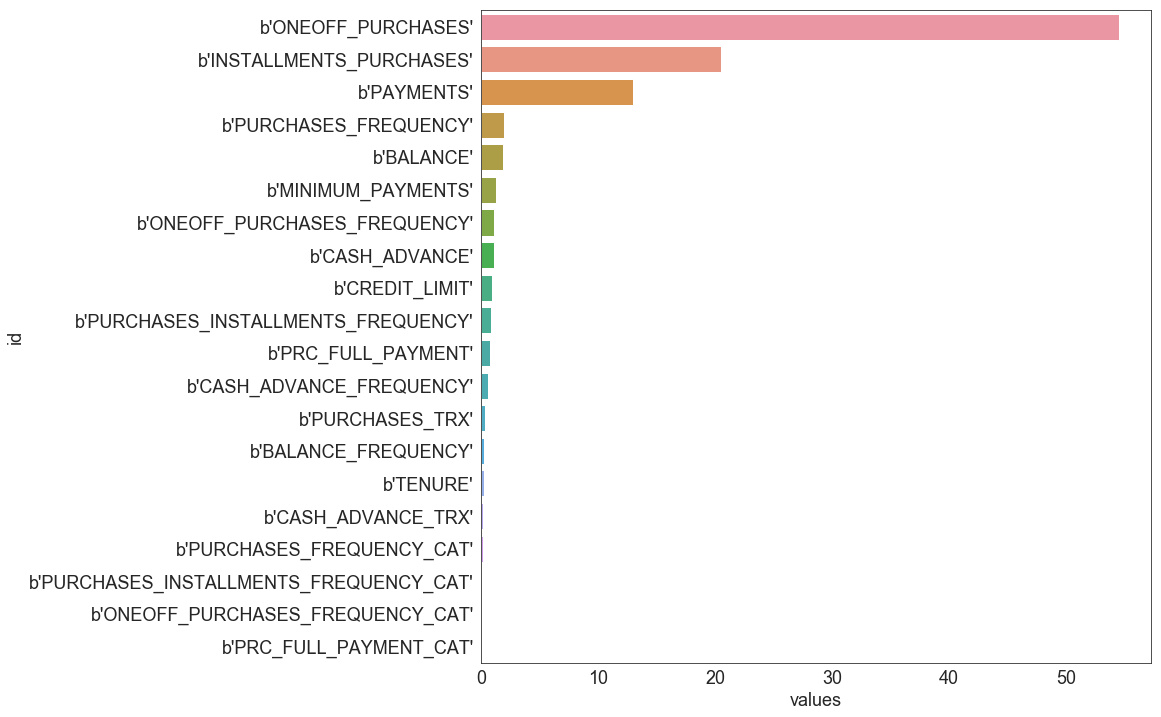

In [129]:
f2_imp = pd.DataFrame(model.get_feature_importance(prettified=True,
                       thread_count=-1,
                       verbose=False), columns=['id','values'])
ax = sns.barplot(x="values", y="id", data=f2_imp)

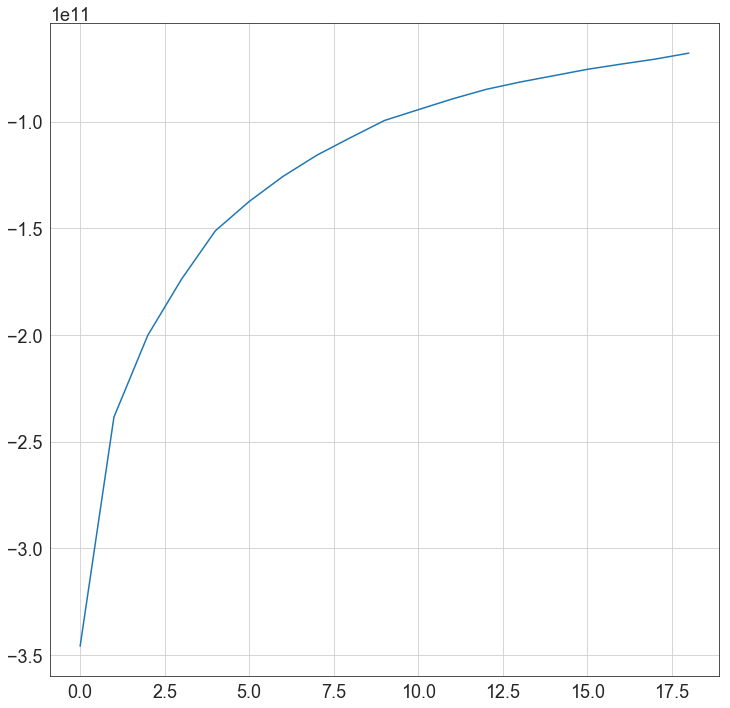

In [140]:
from sklearn.cluster import KMeans
Ks = range(1, 20)
cols = X.columns[:-4]
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(X[cols]).score(X[cols]) for i in range(len(km))]
plt.plot(range(len(km)), score)
plt.grid(True)
plt.show()

In [ ]:
from sklearn import cluster, mixture
gmm = mixture.GaussianMixture(
        n_components=5, covariance_type='full')